In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Solving linear regression
## Create synthetic data

In [2]:
gt_samples = 1000
gt_bias = 13
gt_noise = 10
gt_random_state = 42

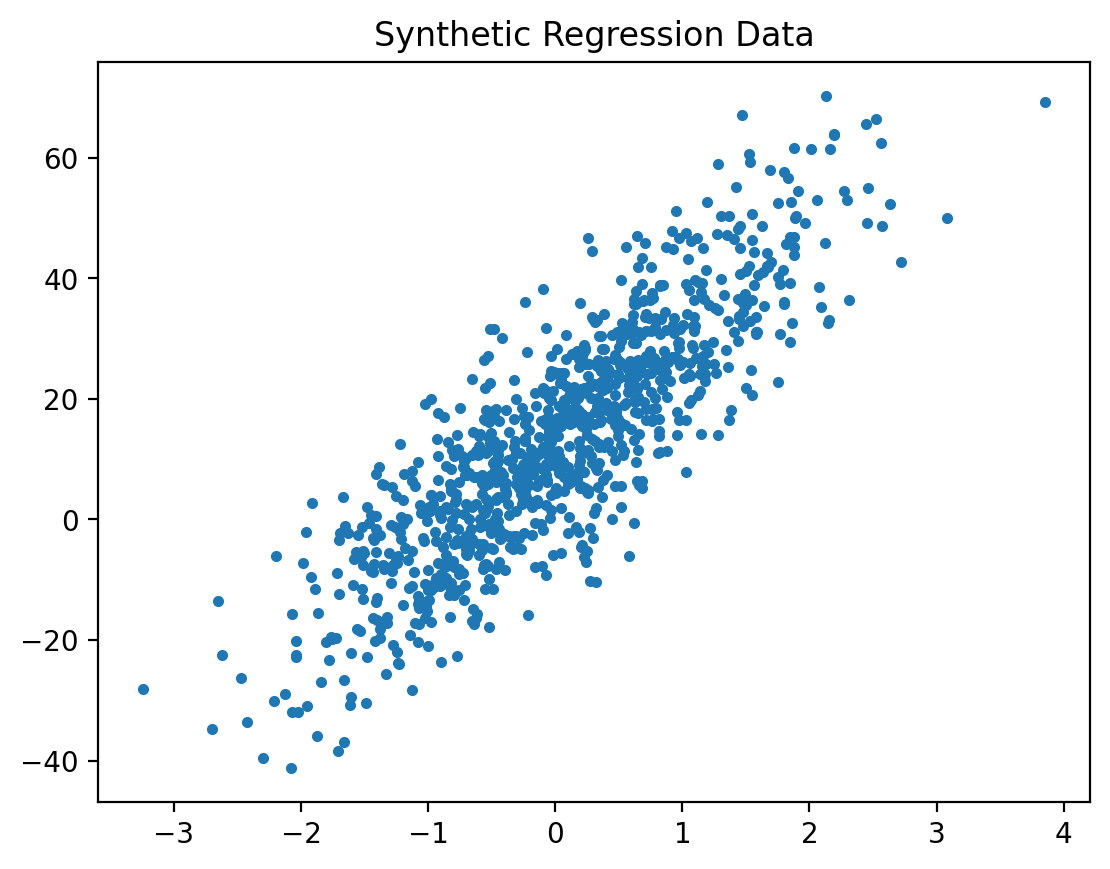

ground truth coef = 16.7483, bias = 13.0000


In [3]:
X, y, gt_coef = make_regression(
    n_samples=gt_samples, 
    n_features=1, 
    bias=gt_bias, 
    noise=gt_noise, 
    coef=True, 
    random_state=gt_random_state
)
x = X.reshape(-1)
plt.plot(x, y, '.')
plt.title('Synthetic Regression Data')
plt.show()
print(f'ground truth coef = {gt_coef:.04f}, bias = {gt_bias:.04f}')

In [4]:
import pandas as pd
import numpy as np

pd.DataFrame(np.stack((x, y), axis=1), columns=('x', 'y')).to_csv('./data/data.csv', index=False)

## np.linalg model

np.linalg.lstsq coef=16.6335, bias=13.0453


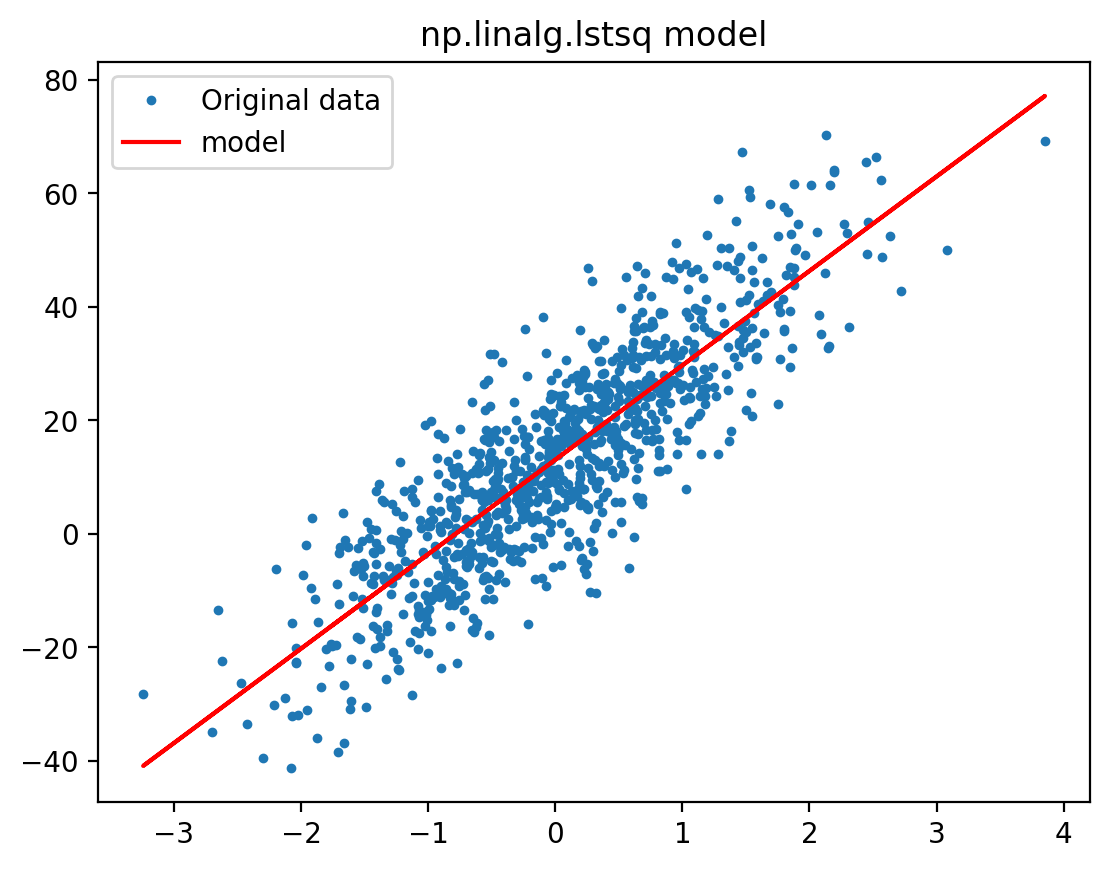

In [5]:
import numpy as np

A = np.vstack([x, np.ones(len(x))]).T
coef, bias = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'np.linalg.lstsq coef={coef:.04f}, bias={bias:.04f}')

plt.plot(x, y, '.', label='Original data', markersize=5)
plt.plot(x, coef*x + bias, 'r', label='model')
plt.title('np.linalg.lstsq model')
plt.legend()
plt.show()

### Timing

In [6]:
%%timeit
np.linalg.lstsq(A, y, rcond=None)[0]

44.9 µs ± 934 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## sklearn.linear_model

sklearn.linear_model coef=16.6335, bias=13.0453


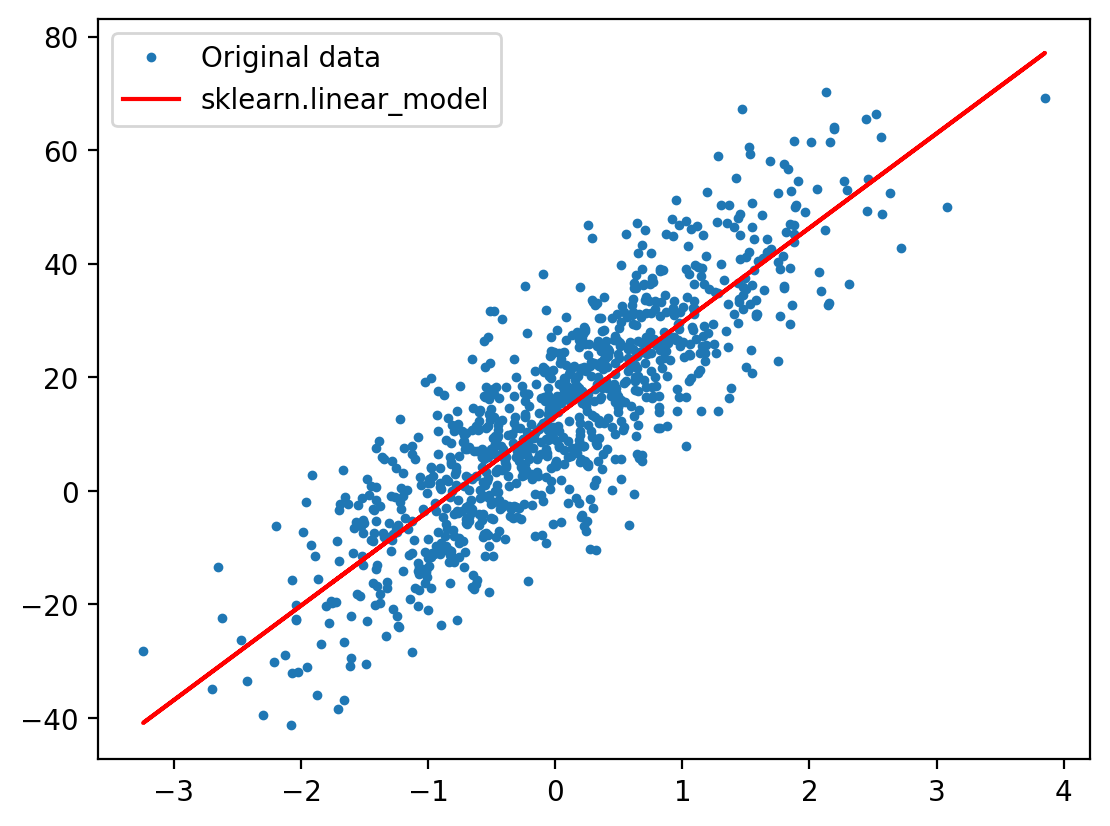

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
bias = model.intercept_
coef = model.coef_[0]
print(f'sklearn.linear_model coef={coef:.04f}, bias={bias:.04f}')

plt.plot(x, y, '.', label='Original data', markersize=5)
plt.plot(x, coef*x + bias, 'r', label='sklearn.linear_model')
plt.legend()
plt.show()

### Timing

In [8]:
%%timeit
model.fit(X, y)

653 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
